This set of raw data contains crash reports from Monroe County in 2020. This data originates from the “Automated Report and Information Exchange System” (ARIES) of the Indiana State Police. This system contains crash data organized by collisions, units (vehicles), and individuals.

As with any database, the validity of conclusions resulting from the data is contingent upon accurate and complete data entry. Lack of information from hit-and-run collisions, confusion surrounding alternate names of roads (e.g., Country Club Drive, Winslow Road), misspelled or mis-entered street names, GPS errors, and incomplete data entry undoubtedly introduce some error into the results of this report. Therefore, results should not be interpreted rigidly.

For more information: https://data.bloomington.in.gov/dataset/traffic-data/resource/54c306a8-0d7d-4a33-b3c3-9afda12c856e

## Data Loading:

In [158]:
# import libraries:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1)
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#from IPython.display import display, HTML

from mpl_toolkits.mplot3d import Axes3D

import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [159]:
#loading data:
df=pd.read_csv('crash.csv')
df.shape

(2746, 37)

From the data set, we know that there are 2746 cases of crash accidents in this area in 2020.

## Data preprocessing
- 1. value check
- 2. data types check
- 3. Missing value

In [160]:
print(display(df.head()))
#for better processing, we can convert all strings to lower
for col in df.columns:
    if type(df[col][0])==str:
        df[col]=df[col].str.lower()
print('After lower string variables:', display(df.head()))

,Agency,City,Collision Date,Collision Time,Vehicles Involved,Trailers Involved,Number Injured,Number Dead,Number Deer,House Number,Roadway Interchange,Roadway Ramp,Roadway Id,Intersecting Road,Interchange,Feet From,Direction,Latitude,Longitude,Roadway Class,Hit and Run,Locality,School Zone,Rumble Strips,Construction,Construction Type,Light Condition,Weather Conditions,Surface Condition,Type of Median,Roadway Junction Type,Road Character,Roadway Surface,Primary Factor,Manner of Collision,Unique Location Id,Traffic Control
0,MONROE SD,BLOOMINGTON,12/24/2020,7:10 PM,1,0.0,4,0,0,NaN,NaN,NaN,WALNUT ST,FAIRFAX,NaN,NaN,NaN,39.107220,-86.531496,COUNTY ROAD,N,URBAN,N,N,N,NaN,DARK (NOT LIGHTED),CLEAR,DRY,NaN,T-INTERSECTION,STRAIGHT/GRADE,ASPHALT,RAN OFF ROAD RIGHT,RAN OFF ROAD,FAIRFAXRDWALNUTSTPIKE,STOP SIGN
1,BLOOMINGTON PD,BLOOMINGTON,5/18/2020,11:37 AM,2,0.0,4,0,0,NaN,NaN,NaN,WALNUT,SOUTHERN,NaN,NaN,NaN,39.149770,-86.533500,LOCAL/CITY ROAD,N,URBAN,N,N,N,NaN,DAYLIGHT,CLOUDY,DRY,NaN,FOUR-WAY INTERSECTION,STRAIGHT/GRADE,ASPHALT,FAILURE TO YIELD RIGHT OF WAY,RIGHT ANGLE,SOUTHERNDRWALNUTST,STOP SIGN
2,BLOOMINGTON PD,BLOOMINGTON,3/9/2020,3:21 PM,2,0.0,4,0,0,NaN,NaN,NaN,N WALNUT,E 4TH,NaN,NaN,NaN,39.165648,-86.533600,LOCAL/CITY ROAD,N,URBAN,N,N,Y,WORK ON SHOULDER,DAYLIGHT,CLEAR,DRY,NaN,FOUR-WAY INTERSECTION,STRAIGHT/LEVEL,ASPHALT,FAILURE TO YIELD RIGHT OF WAY,RIGHT ANGLE,E4THSTNWALNUTST,TRAFFIC CONTROL SIGNAL
3,BLOOMINGTON PD,BLOOMINGTON,7/11/2020,12:02 AM,1,0.0,3,0,0,NaN,NaN,NaN,E MILLER,S PARK,NaN,45.0,E,39.147024,-86.524288,LOCAL/CITY ROAD,N,URBAN,N,N,N,NaN,DARK (LIGHTED),CLEAR,DRY,NaN,T-INTERSECTION,STRAIGHT/LEVEL,ASPHALT,TIRE FAILURE OR DEFECTIVE,RAN OFF ROAD,EMILLERDRSPARKAVE,NONE
4,MONROE SD,BLOOMINGTON,10/18/2020,2:51 AM,2,0.0,3,0,0,NaN,NaN,NaN,I69S,NaN,NaN,NaN,NaN,0.000000,0.000000,INTERSTATE,N,RURAL,N,N,N,NaN,DARK (NOT LIGHTED),CLEAR,DRY,NaN,NO JUNCTION INVOLVED,STRAIGHT/LEVEL,ASPHALT,DRIVER ASLEEP OR FATIGUED,REAR END,I69S122.5,LANE CONTROL


None


,Agency,City,Collision Date,Collision Time,Vehicles Involved,Trailers Involved,Number Injured,Number Dead,Number Deer,House Number,Roadway Interchange,Roadway Ramp,Roadway Id,Intersecting Road,Interchange,Feet From,Direction,Latitude,Longitude,Roadway Class,Hit and Run,Locality,School Zone,Rumble Strips,Construction,Construction Type,Light Condition,Weather Conditions,Surface Condition,Type of Median,Roadway Junction Type,Road Character,Roadway Surface,Primary Factor,Manner of Collision,Unique Location Id,Traffic Control
0,monroe sd,bloomington,12/24/2020,7:10 pm,1,0.0,4,0,0,NaN,NaN,NaN,walnut st,fairfax,NaN,NaN,NaN,39.107220,-86.531496,county road,n,urban,n,n,n,NaN,dark (not lighted),clear,dry,NaN,t-intersection,straight/grade,asphalt,ran off road right,ran off road,fairfaxrdwalnutstpike,stop sign
1,bloomington pd,bloomington,5/18/2020,11:37 am,2,0.0,4,0,0,NaN,NaN,NaN,walnut,southern,NaN,NaN,NaN,39.149770,-86.533500,local/city road,n,urban,n,n,n,NaN,daylight,cloudy,dry,NaN,four-way intersection,straight/grade,asphalt,failure to yield right of way,right angle,southerndrwalnutst,stop sign
2,bloomington pd,bloomington,3/9/2020,3:21 pm,2,0.0,4,0,0,NaN,NaN,NaN,n walnut,e 4th,NaN,NaN,NaN,39.165648,-86.533600,local/city road,n,urban,n,n,y,WORK ON SHOULDER,daylight,clear,dry,NaN,four-way intersection,straight/level,asphalt,failure to yield right of way,right angle,e4thstnwalnutst,traffic control signal
3,bloomington pd,bloomington,7/11/2020,12:02 am,1,0.0,3,0,0,NaN,NaN,NaN,e miller,s park,NaN,45.0,E,39.147024,-86.524288,local/city road,n,urban,n,n,n,NaN,dark (lighted),clear,dry,NaN,t-intersection,straight/level,asphalt,tire failure or defective,ran off road,emillerdrsparkave,none
4,monroe sd,bloomington,10/18/2020,2:51 am,2,0.0,3,0,0,NaN,NaN,NaN,i69s,NaN,NaN,NaN,NaN,0.000000,0.000000,interstate,n,rural,n,n,n,NaN,dark (not lighted),clear,dry,NaN,no junction involved,straight/level,asphalt,driver asleep or fatigued,rear end,i69s122.5,lane control


After lower string variables: None


In [161]:
#data type check:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Agency                 2746 non-null   object 
 1   City                   2746 non-null   object 
 2   Collision Date         2746 non-null   object 
 3   Collision Time         2746 non-null   object 
 4   Vehicles Involved      2746 non-null   int64  
 5   Trailers Involved      2525 non-null   float64
 6   Number Injured         2746 non-null   int64  
 7   Number Dead            2746 non-null   int64  
 8   Number Deer            2746 non-null   int64  
 9   House Number           528 non-null    object 
 10  Roadway Interchange    24 non-null     object 
 11  Roadway Ramp           24 non-null     object 
 12  Roadway Id             2704 non-null   object 
 13  Intersecting Road      2044 non-null   object 
 14  Interchange            0 non-null      float64
 15  Feet

As we can see, this data set has several data types need to be converted to the right one. 

For example, collision time should be datetime instead of object

In [32]:
df['Collision Time'].unique()

array(['16:10 pm', '7:10 pm', '11:37 am', ..., '1:55 am', '10:28 am',
       '6:27 am'], dtype=object)

In [162]:
# covert time, date to datetime:
df['Collision Date']=pd.to_datetime(df['Collision Date'])
# Let's convert different time zones for time, 
#morning:8 to 12pm, afternoon: 12pm to 6 pm, night: 6 pm to 12 pm, midnight: 12 am to 8 pm
time=[]
for i in df['Collision Time'].str.split(' '):
    time.append(i[0])
df['Collision Time']=time    
df['Collision Time']=[i.zfill(5) for i in time]

for i in range(len(df['Collision Time'])):
    if '00:00'<df['Collision Time'][i]<='06:00':
        df['Collision Time'][i]='Midnight'
    elif '6:00'<df['Collision Time'][i]<='12:00':
        df['Collision Time'][i]='Morning'
    elif '12:00'<df['Collision Time'][i]<='18:00':
        df['Collision Time'][i]='Afternoon'
    else:
        df['Collision Time'][i]='Night'

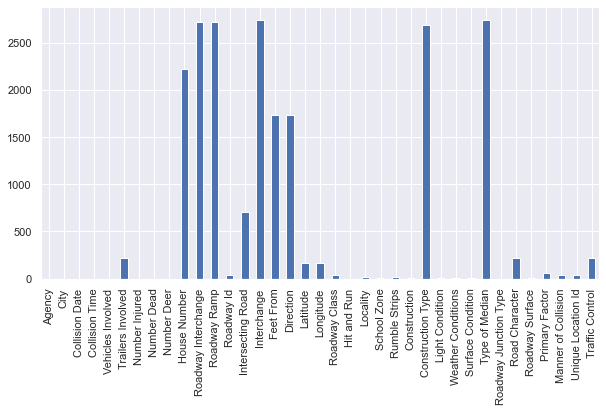

In [163]:
# Missing values:
plt.figure(figsize=(10,5))
df.isnull().sum().plot(kind='bar');

- From the missing values checking, we can see that we have many missing values in our data set, exspecially for certarin variables such as construction type, feet from, interchange and etc.
- Because we have 2746 cases of crash accidents, so we can remove those variables who have more than 2700 missing values variable.


In [164]:
# missing value imputation:
#1. convert roadway interchange, interchange, roadway ramp to (1/0), 1 means happend in roadway interchange, 0 means not happend in roadway interchange
df['Roadway Interchange']=df['Roadway Interchange'].fillna(0)
df['Roadway Ramp']=df['Roadway Ramp'].fillna(0)
df['Roadway Interchange']=[np.where(i==0, 0, 1) for i in df['Roadway Interchange']]
df['Roadway Ramp']=[np.where(i==0, 0, 1) for i in df['Roadway Ramp']]
df['Interchange']=df['Interchange'].fillna(0)
df['Interchange']=[np.where(i==0, 0, 1) for i in df['Interchange']]
df['Intersecting Road']=df['Intersecting Road'].fillna(0)
df['Intersecting Road']=[np.where(i==0, 0, 1) for i in df['Intersecting Road']]
df['Trailers Involved']=df['Trailers Involved'].fillna(0)
for col in ['Roadway Interchange','Roadway Ramp','Interchange','Intersecting Road','Trailers Involved']:
    df[col]=df[col].astype('int')
#2. remove meaningless variables:
df=df.drop(columns={"House Number",'Feet From', 'Construction Type', 'Type of Median',"Unique Location Id"})
# Unique location id is unique, so there's no contribution to our data
#3. rest of the missing values, we can impute them as unknown, because most of them are categorical
df=df.fillna('UNK')

In [35]:
df.columns

Index(['Agency', 'City', 'Collision Date', 'Collision Time',
       'Vehicles Involved', 'Trailers Involved', 'Number Injured',
       'Number Dead', 'Number Deer', 'House Number', 'Roadway Interchange',
       'Roadway Ramp', 'Roadway Id', 'Intersecting Road', 'Interchange',
       'Feet From', 'Direction', 'Latitude', 'Longitude', 'Roadway Class',
       'Hit and Run?', 'Locality', 'School Zone', 'Rumble Strips',
       'Construction', 'Construction Type', 'Light Condition',
       'Weather Conditions', 'Surface Condition', 'Type of Median',
       'Roadway Junction Type', 'Road Character', 'Roadway Surface',
       'Primary Factor', 'Manner of Collision', 'Unique Location Id',
       'Traffic Control'],
      dtype='object')

In [36]:
df['Roadway Interchange']=df['Roadway Interchange'].fillna(0.)
df['Roadway Interchange']=[np.where(i==0., 0., 1.) for i in df['Roadway Interchange']]
df['Roadway Interchange'][0]

array(0.)

In [165]:
sum(df.isnull().sum())

0

# EDA
- Based on different variables, we can analyze the relationship each variable and the crash

In [27]:
[np.where(i==0, int(0), 1) for i in df['Roadway Interchange']]

[array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),

- 1. Correlation map

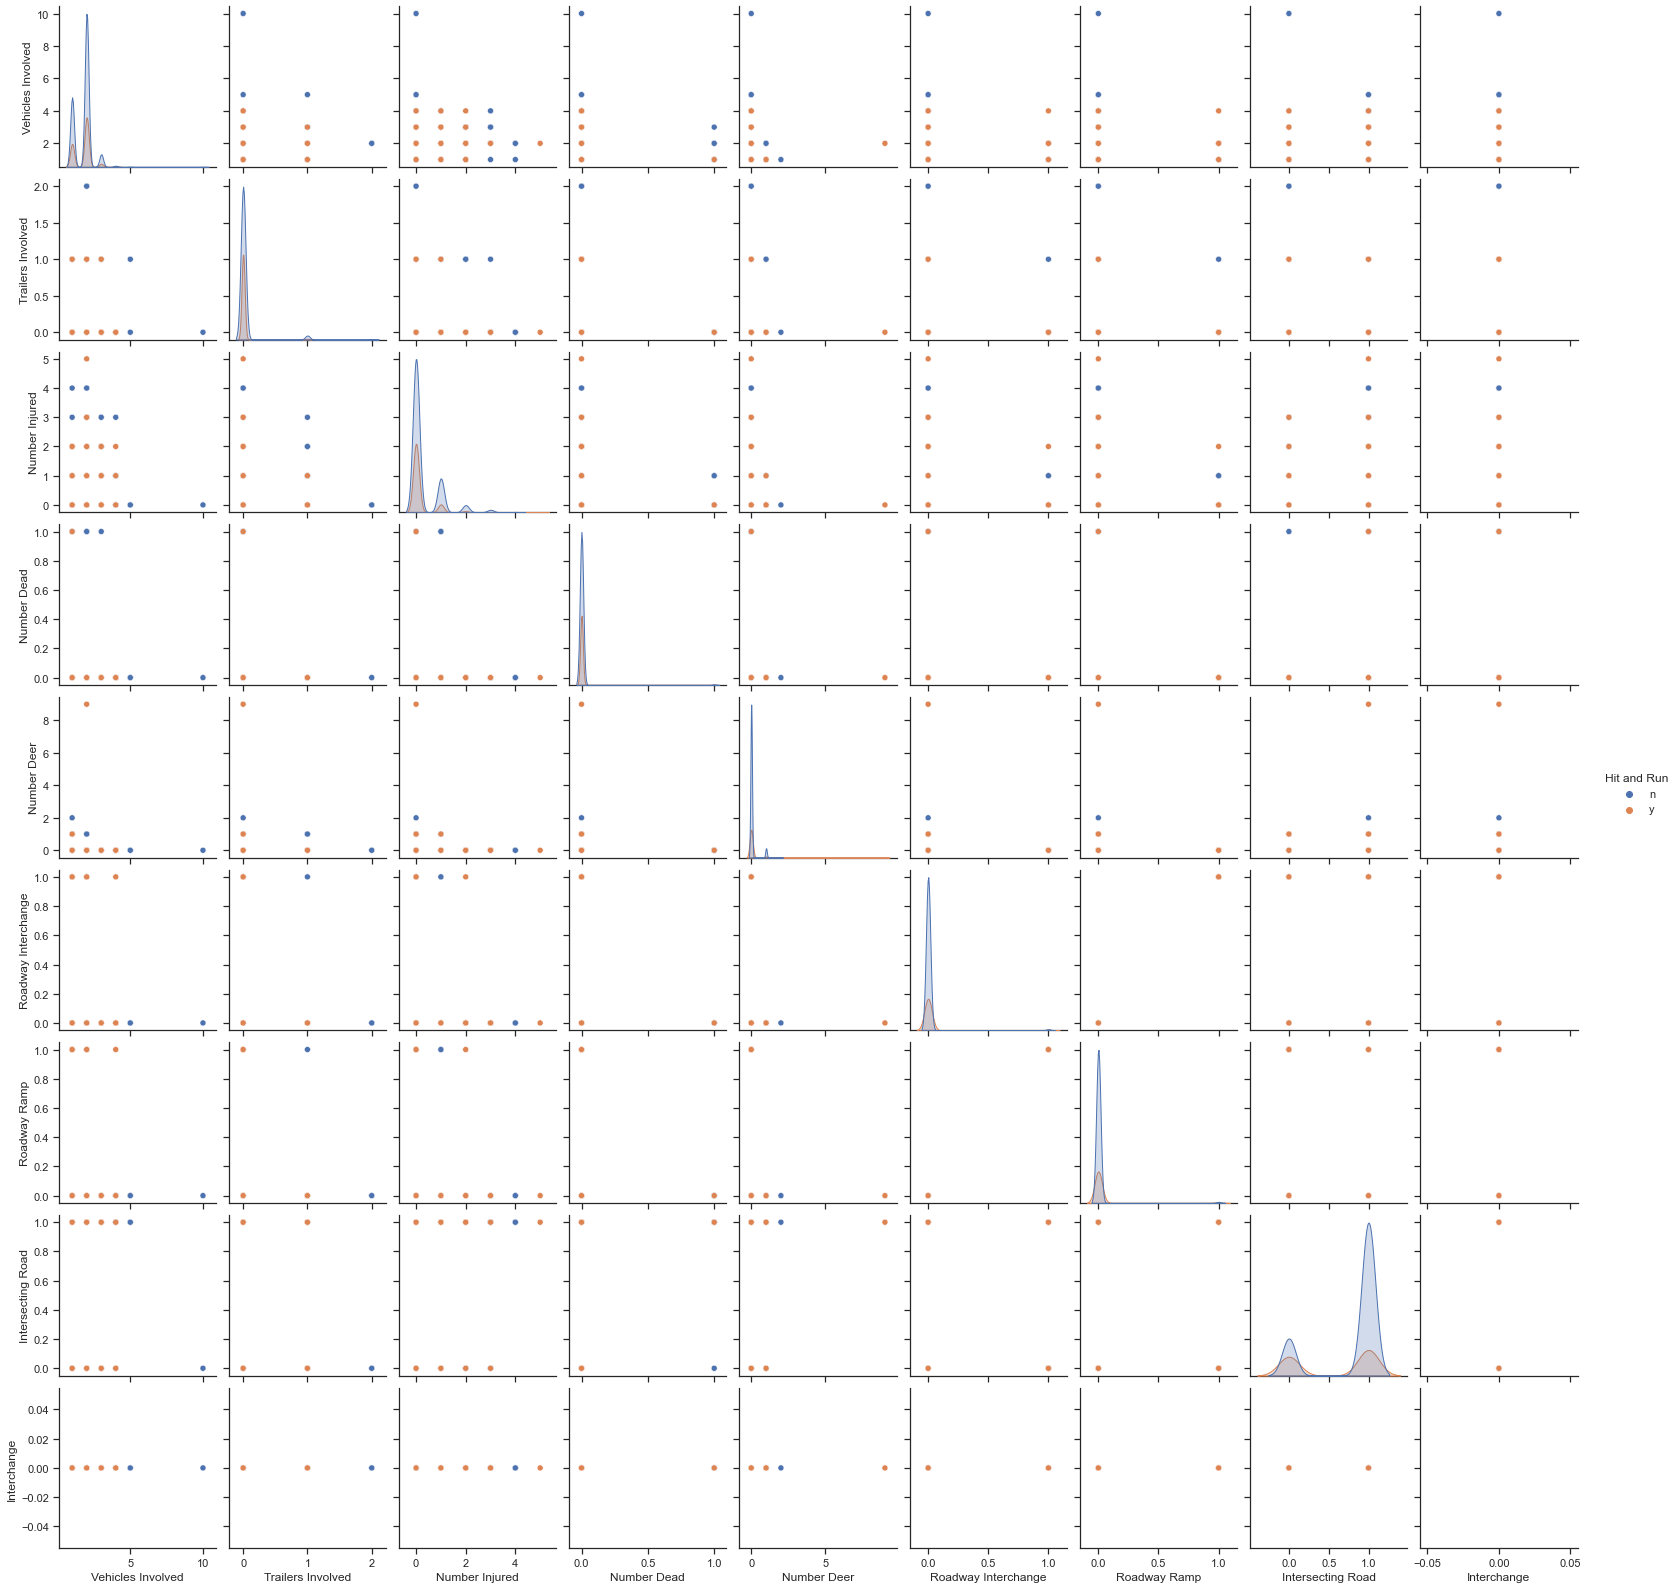

In [167]:
import seaborn as sn
sns.set(style="ticks")
sns.pairplot(df, hue="Hit and Run")

As we can see from the pair plot, most of our variables are categorical data. And there are more information as follows:
- 1. More people injured, the wrecker are more easy to hit and run.
- 2. Intersecting road has a high propobility to have crash accidents!
- 3. The more vehicles involved, the more numbers of people get injured.

- 2. Crash Cases Distribution 

In [182]:
import folium
import pandas as pd

# define the world map
world_map = folium.Map()
data=df[['Latitude', 'Longitude']]
data=data[data['Latitude'] !='UNK']
data[data['Latitude'] !=0].shape
# get the first 200 crimes in the cdata
limit = 300
data = data.iloc[0:limit, :]

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# Loop through the 200 crimes and add each to the incidents feature group
for lat, lng, in zip(data['Latitude'], data['Longitude']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )

# Add incidents to map
san_map = folium.Map(location=[39.1, -86.5], zoom_start=12)
san_map.add_child(incidents)

As we can see that most of the accidents happend along the main road including highways, urban area, especially near downtown have much more accdients than rual area.

- 3. Compare crashes cases from different agency and city

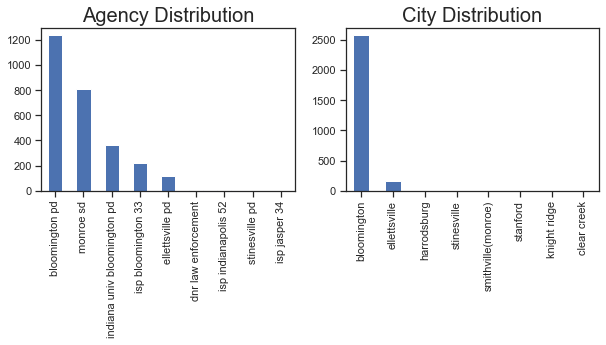

In [171]:
fig = plt.figure(figsize=(10, 3))
f1 = fig.add_subplot(121)
ax = df['Agency'].value_counts().plot(kind="bar").set_title('Agency Distribution', fontsize=20)
f1 = fig.add_subplot(122)
ax2 = df['City'].value_counts().plot(kind="bar").set_title('City Distribution',fontsize=20)
# f1 = fig.add_subplot(133)
# ax2 = df['Agency'].value_counts().plot(kind="bar")

As we can see, most of the cases from bloomington pd, the same as the city. Most of the cases happened at bloomington.

- 3. How seriouse Crash cases are based on different variables

    - How many Vehicles Involved:
    - How many trailers involved
    - How many people get injured
    - How many people dead 
    - How many deers involved
    - Rural or Urban?
    - Happend in school zone or not
    - Rumble strips or not
    - Under construction or not
    



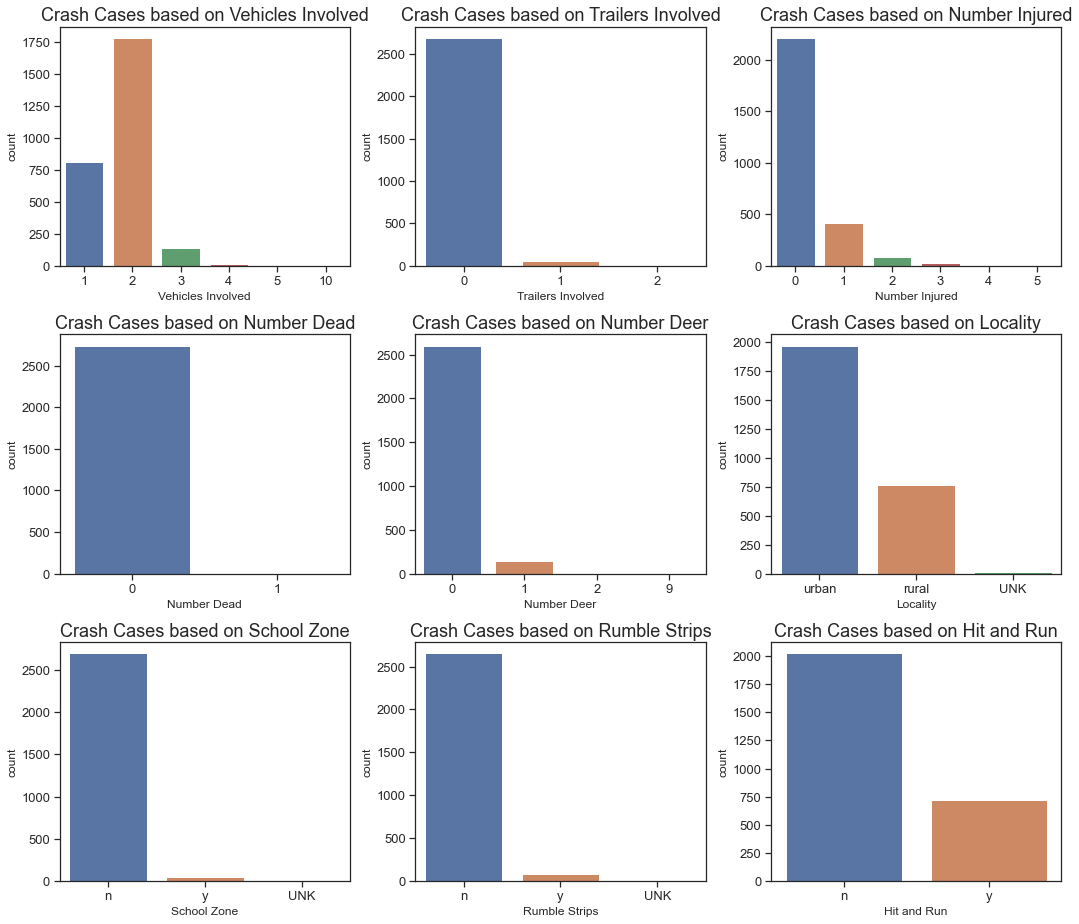

In [173]:
cols=['Vehicles Involved', 'Trailers Involved', 'Number Injured',
       'Number Dead', 'Number Deer','Locality','School Zone', 'Rumble Strips','Hit and Run']
plt.figure(figsize=(15,13))
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    plt.title('Crash Cases based on '+str(cols[i]),fontsize=18)
    sns.countplot(df[cols[i]])
plt.tight_layout()
plt.show()

- 4. Weather and road condition:
    - Roadway Interchange
    - Roadway Ramp
    - Intersecting Road
    - Direction
    - Roadway Class
    - Roadway Junction Type
    - Road Character
    - Roadway Surface
    - Traffic Control

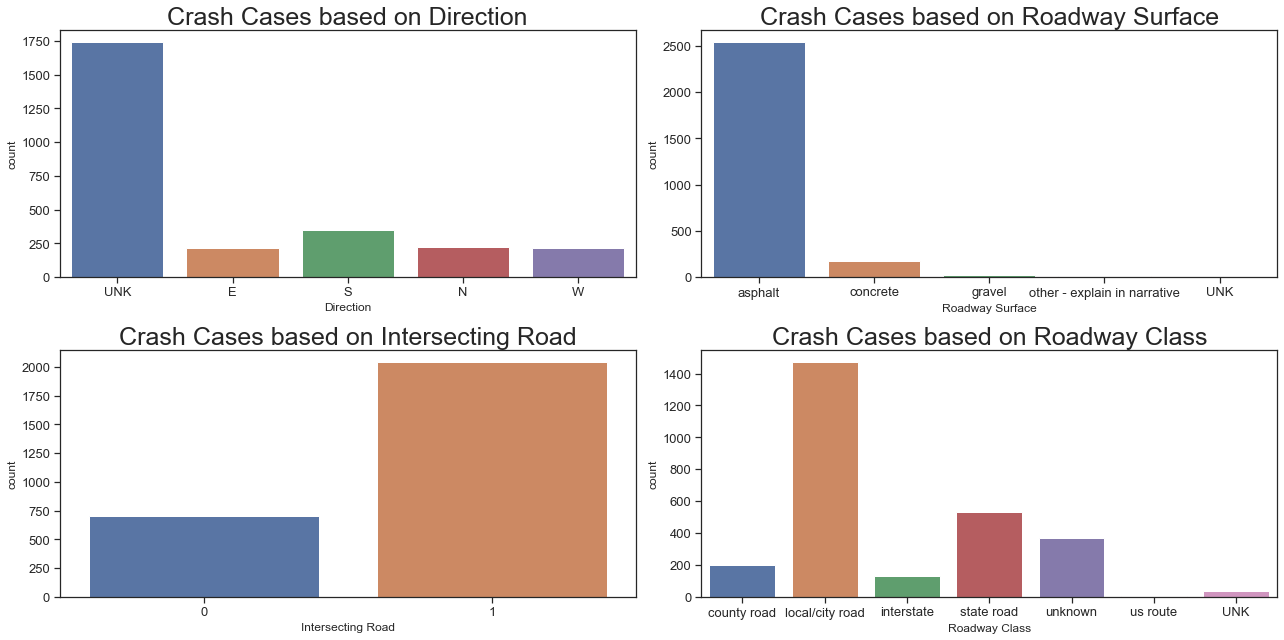

In [185]:
cols=["Direction","Roadway Surface","Intersecting Road","Roadway Class"]
plt.figure(figsize=(18,13))
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    plt.title('Crash Cases based on '+str(cols[i]),fontsize=25)
    sns.countplot(df[cols[i]])
plt.tight_layout()
plt.show()

- 3. Road condition



In [223]:
df["Road Character"].value_counts()

straight/level        1392
straight/grade         673
UNK                    222
curve/grade            161
curve/level            150
straight/hillcrest      68
non-roadway crash       67
curve/hillcrest         13
Name: Road Character, dtype: int64

<AxesSubplot:title={'center':'Light Condition'}, xlabel='Light Condition', ylabel='count'>

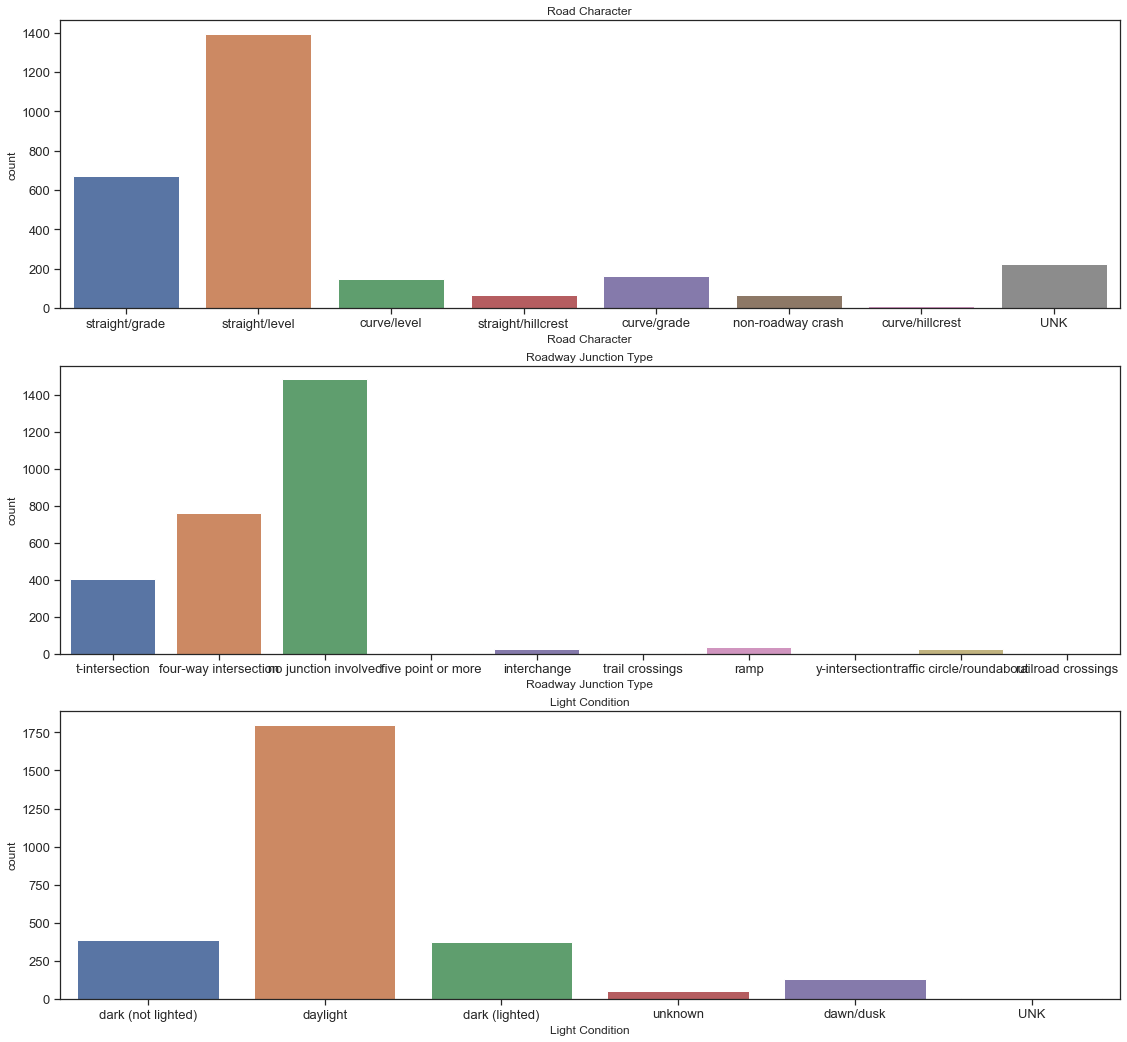

In [186]:
plt.figure(figsize=(19,18))

plt.subplot(3,1,1)
plt.title("Road Character")
sns.countplot(df["Road Character"])

plt.subplot(3,1,2)
plt.title("Roadway Junction Type")
sns.countplot(df["Roadway Junction Type"])
plt.subplot(3,1,3)
plt.title('Light Condition')
sns.countplot(df['Light Condition'])

- Weather Condition

<AxesSubplot:title={'center':'Light Condition'}, xlabel='Light Condition', ylabel='count'>

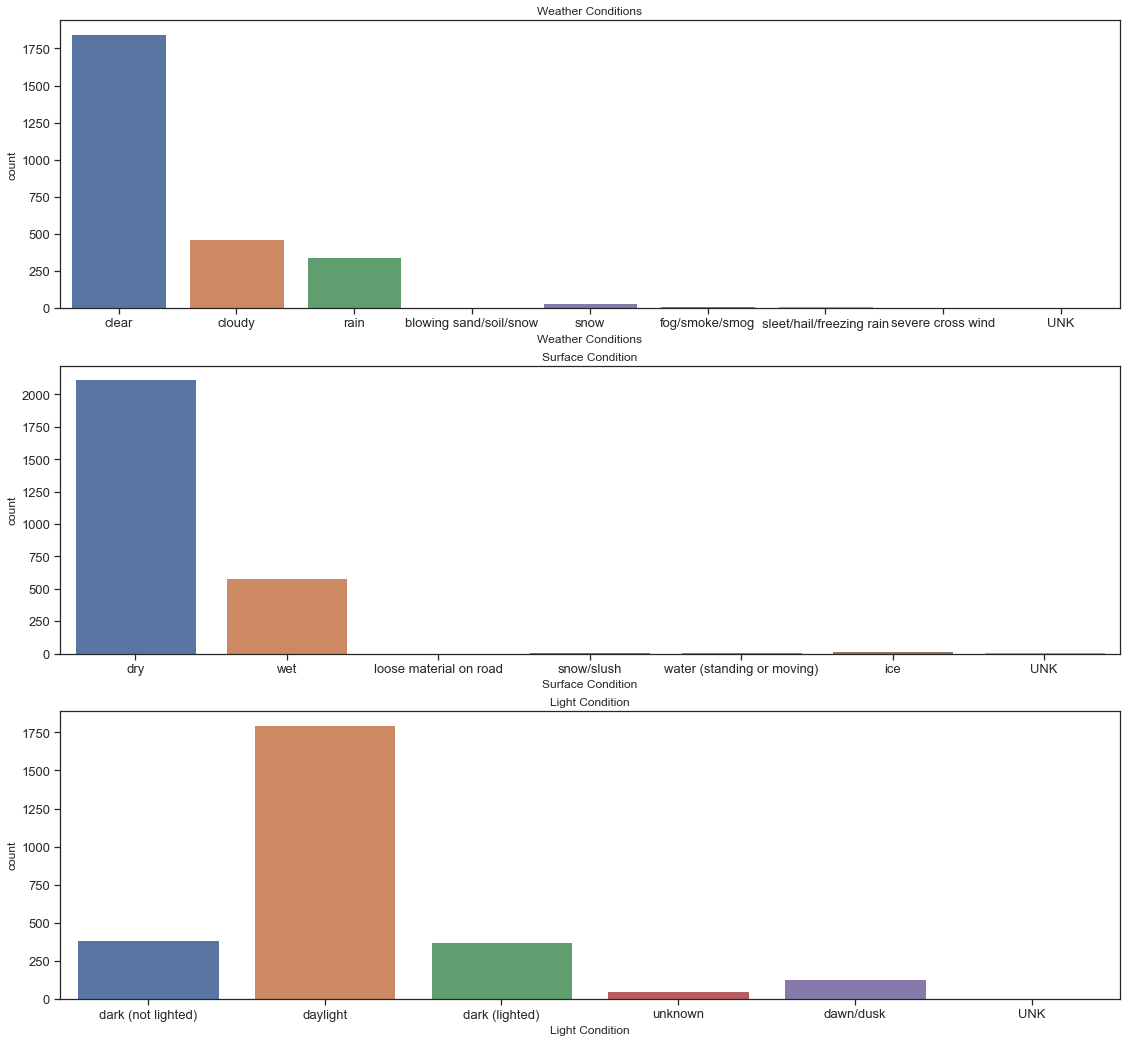

In [187]:
plt.figure(figsize=(19,18))

plt.subplot(3,1,1)
plt.title('Weather Conditions')
sns.countplot(df["Weather Conditions"])

plt.subplot(3,1,2)
plt.title('Surface Condition')
sns.countplot(df["Surface Condition"])
plt.subplot(3,1,3)
plt.title('Light Condition')
sns.countplot(df['Light Condition'])


# plt.subplot(1,2,2)
# plt.title('Symboling vs Price')
# sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

# plt.show()

- 5. Top reasons and manners of crash accidents

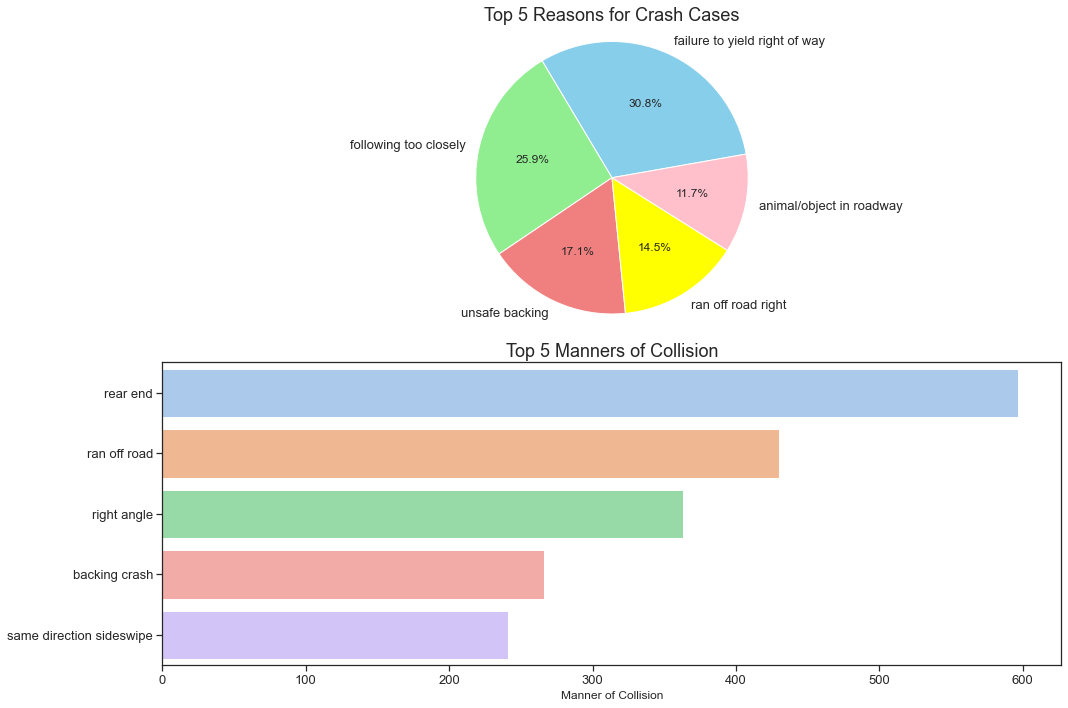

In [175]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
labels = 'failure to yield right of way', 'following too closely', 'unsafe backing',"ran off road right",'animal/object in roadway'
sizes = [489, 411, 272,230,186]
colors = ['skyblue', 'lightgreen', 'lightcoral','yellow', 'pink']
plt.pie(sizes,               
        labels=labels,      
        colors=colors,      
        autopct='%1.1f%%',  
        startangle=10
        )

plt.axis('equal')
plt.title('Top 5 Reasons for Crash Cases', fontsize=18)

plt.subplot(2,1,2)
sns.barplot(y=manner.index, x=manner['Manner of Collision'], palette=("pastel"),orient='h')
plt.title('Top 5 Manners of Collision', fontsize=18)
plt.tight_layout()

plt.show()

As we can see, the main reason for crash accidents is failure to yield right of the way.

Interesting point is animal/object in the roadway is a main reason for crashes accidents too.

- Traffic Control

In [176]:
df['Traffic Control'].value_counts().to_frame()[:8]

,Traffic Control
none,1360
traffic control signal,548
lane control,284
stop sign,277
UNK,223
no passing zone,14
roundabout intersection,13
other regulatory sign/marking,7


# Data Modeling